<a href="https://colab.research.google.com/github/Pranav-2198/MindGame-Insights/blob/main/MindGame_Insights_Milestone1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1 - Basic Data Cleaning and Exploration

This notebook contains preliminary data analysis on a dataset related to gaming studies. The analysis is conducted using Python, leveraging popular libraries such as pandas, matplotlib, seaborn, and more.

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import seaborn as sns

In [2]:
# Check the current working directory
import os
os.getcwd()

'/content'

In [9]:
# Detect the character encoding of the CSV file to ensure correct reading
import chardet
rawdata = open('/content/GamingStudy_data.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [10]:
# Load the CSV data into a DataFrame and remove any unnecessary columns
game_df = pd.read_csv('/content/GamingStudy_data.csv',encoding = 'Windows-1252')
game_df.drop(columns = ["Unnamed: 0"], inplace = True)
game_df.head()

,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,42052.004366,0,0,0,0,1,0,0,Not difficult at all,3,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,42052.006803,1,2,2,2,0,1,0,Somewhat difficult,3,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,42052.038599,0,2,2,0,0,3,1,Not difficult at all,2,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,42052.068037,0,0,0,0,0,0,0,Not difficult at all,2,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,42052.089478,2,1,2,2,2,3,2,Very difficult,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [11]:
# General descriptive statistics for numerical columns
game_df[["Age", "Hours", "GAD_T", "SWL_T", "SPIN_T"]].describe()

,Age,Hours,GAD_T,SWL_T,SPIN_T
count,13464.000000,13434.000000,13464.000000,13464.000000,12814.000000
mean,20.930407,22.247357,5.211973,19.788844,19.848525
std,3.300897,70.284502,4.713267,7.229243,13.467493
min,18.000000,0.000000,0.000000,5.000000,0.000000
25%,18.000000,12.000000,2.000000,14.000000,9.000000
50%,20.000000,20.000000,4.000000,20.000000,17.000000
75%,22.000000,28.000000,8.000000,26.000000,28.000000
max,63.000000,8000.000000,21.000000,35.000000,68.000000


In [12]:
# Describe the data to get basic statistics for categorical columns
# Trying to understand what we are dealing with.
game_df[["Gender","Platform","Game","Work","earnings",
         "whyplay","League","Degree","Playstyle"]].describe()

,Gender,Platform,Game,Work,earnings,whyplay,League,Degree,Playstyle
count,13464,13464,13464,13426,13464,13464,11626,13464,13464
unique,3,3,11,4,314,407,1455,5,298
top,Male,PC,League of Legends,Student at college / university,I play for fun,having fun,Gold,High school diploma (or equivalent),Multiplayer - online - with real life friends
freq,12699,13219,11314,7073,12112,5289,970,8560,5564


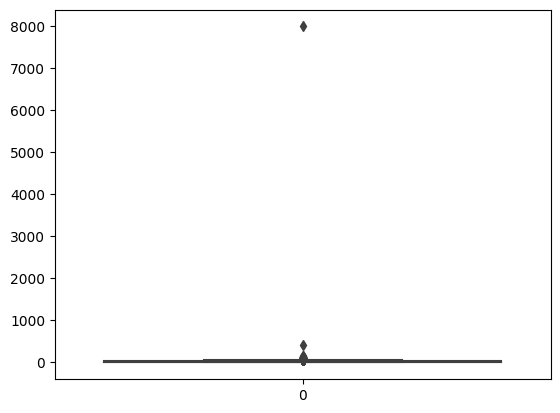

In [13]:
# Box plot to see the outliers in hours. The data is collected for 2 weeks. So the max no. of hours could be 336(168*2)
sns.boxplot(game_df['Hours']);

In [14]:
# Sorting values in hours in desc and seeing the top 10.
game_df["Hours"].sort_values(ascending = False).head(10)
#This shows there are 2 outliers.

3860     8000.0
9435      420.0
8961      160.0
13279     150.0
7615      140.0
3112      140.0
8776      120.0
4363      120.0
4069      120.0
611       120.0
Name: Hours, dtype: float64

In [15]:
# Subset for Hours is less than  "336" to remove outliers
mask_hours = game_df["Hours"] < 336
game_df = game_df[mask_hours]

In [16]:
# Verifying outliers are removed.
game_df["Hours"].describe()

count    13432.000000
mean        21.623809
std         13.778565
min          0.000000
25%         12.000000
50%         20.000000
75%         28.000000
max        160.000000
Name: Hours, dtype: float64

In [17]:
# SPIN_T has a lot of NA values. Removed them.
game_df.dropna(subset=["SPIN_T"], inplace=True)
game_df.head()

,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,42052.004366,0,0,0,0,1,0,0,Not difficult at all,3,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,42052.006803,1,2,2,2,0,1,0,Somewhat difficult,3,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,42052.038599,0,2,2,0,0,3,1,Not difficult at all,2,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,42052.068037,0,0,0,0,0,0,0,Not difficult at all,2,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,42052.089478,2,1,2,2,2,3,2,Very difficult,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


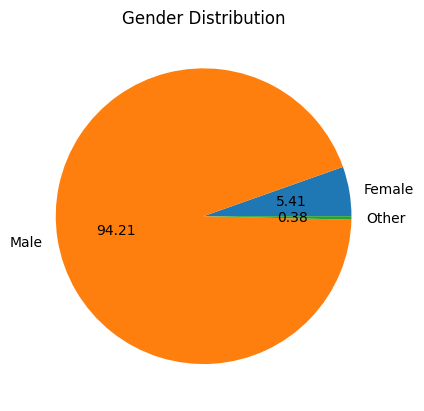

In [18]:
# gender distribution in our dataset
game_df.groupby('Gender').size().plot(kind='pie',autopct='%.2f',  title = "Gender Distribution");

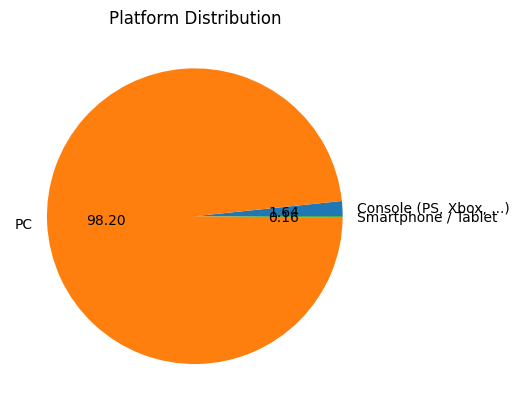

In [19]:
# Platform  distribution in our dataset (PC, console, smartphone/tablet)
game_df.groupby('Platform').size().plot(kind='pie',autopct='%.2f',  title = "Platform Distribution");

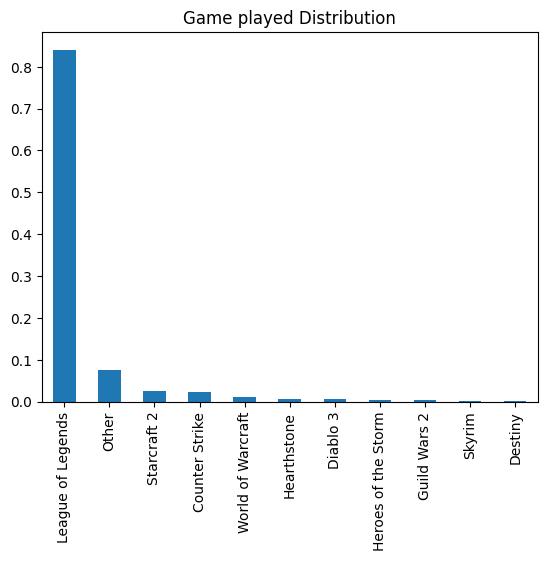

In [20]:
# Game distribution in our dataset
game_df["Game"].value_counts(normalize = True).plot(
    kind= "bar",
    title = "Game played Distribution"
);

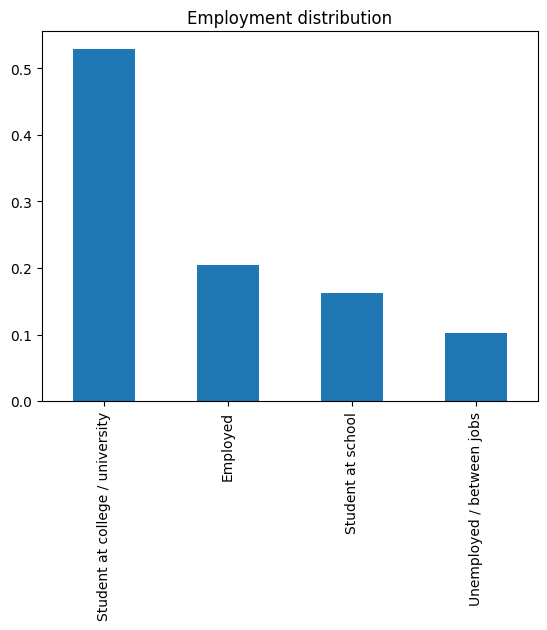

In [21]:
# Employment distribution in our dataset
game_df["Work"].value_counts(normalize = True).plot(
    kind= "bar",
    title= "Employment distribution"
);

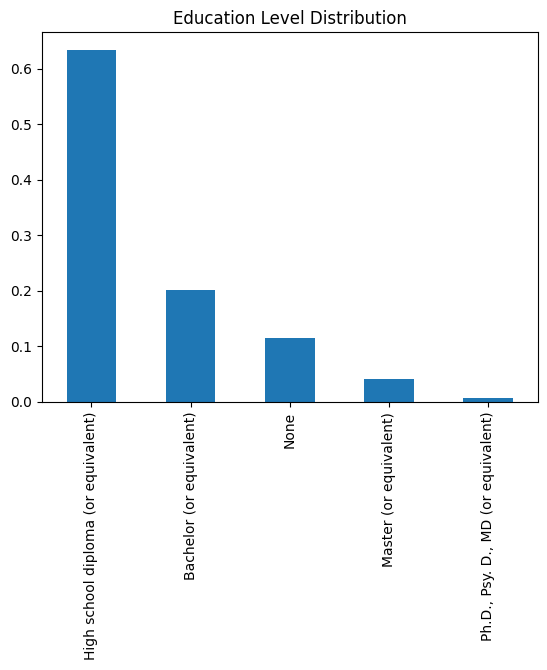

In [22]:
# Education Level Distribution
game_df["Degree"].value_counts(normalize = True).plot(
    kind= "bar",
    title= "Education Level Distribution"
);

In [23]:
# Checking if there are no duplicate values for countries (Such as USA and United States Of America) (Just for our reference)
game_df["Residence"].unique()

array(['USA', 'Germany', 'South Korea', 'Finland', 'Canada', 'Australia',
       'UK', 'Bosnia and Herzegovina', 'Ireland', 'Malaysia', 'Romania',
       'Sweden', 'Turkey', 'Belgium', 'Latvia', 'Austria', 'Japan',
       'South Africa', 'Croatia', 'Switzerland', 'India', 'Netherlands',
       'Denmark', 'Portugal', 'France', 'Argentina', 'Estonia', 'Russia',
       'Czech Republic', 'Lithuania', 'Norway', 'Singapore', 'Poland',
       'China', 'Unknown', 'Serbia', 'Morocco', 'Spain', 'Saudi Arabia',
       'Slovakia', 'Bulgaria', 'Italy', 'Slovenia', 'Greece', 'Jordan',
       'Brazil', 'Venezuela', 'Tunisia', 'Israel', 'Qatar', 'Ukraine',
       'Mexico', 'Macedonia', 'Philippines', 'Hungary', 'Egypt',
       'Iceland', 'New Zealand ', 'Luxembourg', 'Cyprus', 'Algeria',
       'UAE', 'Belarus', 'Chile', 'Lebanon', 'Thailand', 'Peru',
       'Namibia', 'Uruguay', 'Kuwait', 'Bangladesh', 'Malta', 'Syria',
       'Colombia', 'Dominican Republic', 'Nicaragua', 'Hong Kong',
       'Vietna

In [24]:
# Checking if there are no duplicate values for countries (Such as USA and United States Of America) (Just for our reference)
game_df["Birthplace"].unique()

array(['USA', 'Germany', 'Finland', 'Canada', 'Australia', 'UK',
       'Bosnia and Herzegovina', 'South Korea', 'Romania', 'Sweden',
       'Ireland', 'Switzerland', 'Turkey', 'Belgium', 'Latvia', 'Austria',
       'South Africa', 'Croatia', 'India', 'Netherlands', 'Denmark',
       'Portugal', 'France', 'Argentina', 'Colombia', 'Estonia', 'Russia',
       'Slovakia', 'Lithuania', 'Norway', 'Sri Lanka', 'Singapore',
       'Poland', 'Bulgaria', 'Italy', 'Unknown', 'Morocco', 'Spain',
       'Saudi Arabia', 'Czech Republic', 'Georgia', 'China', 'Slovenia',
       'Greece', 'Jordan', 'Brazil', 'Venezuela', 'Tunisia', 'Israel',
       'Hong Kong', 'Ukraine', 'Mexico', 'Hungary', 'New Zealand',
       'Serbia', 'Macedonia', 'Montenegro', 'Algeria', 'Malaysia',
       'Philippines', 'Japan', 'Iceland', 'Luxembourg', 'Belarus',
       'Chile', 'Puerto Rico ', 'Lebanon', 'Vietnam', 'Cyprus',
       'Kazakhstan', 'Cuba', 'Peru', 'Egypt', 'Turkmenistan', 'Namibia',
       'Uruguay', 'Pakistan'

In [25]:
# Grouping the dataset by birthplace and sorting then in Descending order
birthplace_top = game_df.groupby('Birthplace').size().sort_values(ascending = False)

In [26]:
# Grouping the dataset by residence country and sorting then in Descending order
residence_top = game_df.groupby('Residence').size().sort_values(ascending = False)

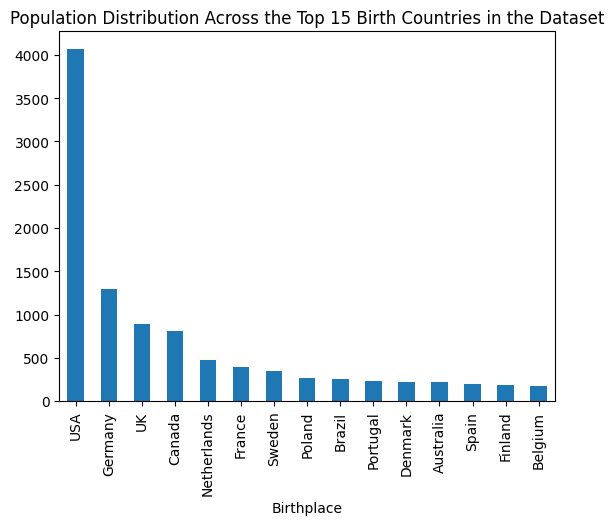

In [27]:
# Population Distribution Across the Top 15 Birth Countries in the Dataset
birthplace_top.head(15).plot(
    kind= "bar",
    title = "Population Distribution Across the Top 15 Birth Countries in the Dataset"
);

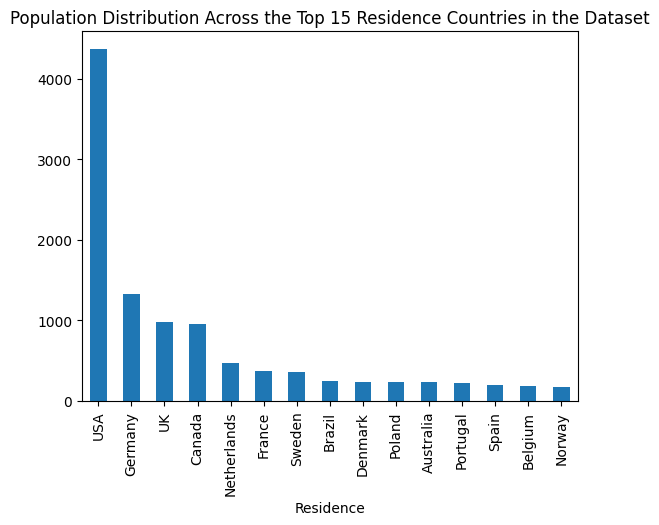

In [28]:
# Population Distribution Across the Top 15  Residence Countries in the Dataset
residence_top.head(15).plot(
    kind= "bar",
    title = "Population Distribution Across the Top 15 Residence Countries in the Dataset"
);

In [29]:
# All the columns in the dataset with data type number - Just used this as a reference for my next steps
game_df.select_dtypes("number")

,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,...,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T
0,42052.004366,0,0,0,0,1,0,0,3,5,...,0.0,1.0,0.0,1.0,0.0,1.0,25,1,23,5.0
1,42052.006803,1,2,2,2,0,1,0,3,5,...,1.0,3.0,3.0,1.0,2.0,1.0,41,8,16,33.0
2,42052.038599,0,2,2,0,0,3,1,2,6,...,0.0,2.0,4.0,4.0,2.0,4.0,32,8,17,31.0
3,42052.068037,0,0,0,0,0,0,0,2,5,...,0.0,0.0,1.0,0.0,0.0,2.0,28,0,17,11.0
4,42052.089478,2,1,2,2,2,3,2,2,2,...,0.0,0.0,0.0,3.0,0.0,1.0,19,14,14,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,42057.756784,1,0,0,1,0,1,1,6,6,...,0.0,0.0,1.0,0.0,0.0,3.0,22,4,28,7.0
13460,42057.811853,3,3,3,3,2,3,3,5,5,...,2.0,2.0,1.0,0.0,1.0,2.0,20,20,23,25.0
13461,42058.169644,0,0,0,0,0,0,0,6,6,...,0.0,1.0,0.0,0.0,0.0,2.0,19,0,32,10.0
13462,42058.244204,3,2,1,3,0,1,3,2,6,...,0.0,3.0,2.0,0.0,1.0,2.0,18,13,16,32.0


In [30]:
# Create correlation matrix and dropping all the columns that is not needed
correlation = game_df.select_dtypes("number").drop(columns= ["Zeitstempel","GAD1",
                                                                      "GAD2","GAD3","GAD4",
                                                                      "GAD5","GAD6","GAD7",
                                                                      "SWL1","SWL2","SWL3",
                                                                      "SWL4","SWL5","SPIN1",
                                                                      "SPIN1","SPIN2","SPIN3",
                                                                      "SPIN4","SPIN5","SPIN6",
                                                                      "SPIN7","SPIN8","SPIN9",
                                                                      "SPIN10","SPIN11","SPIN12",
                                                                      "SPIN13","SPIN14","SPIN15",
                                                                      "SPIN16","SPIN17","streams",
                                                                      "Narcissism",
                                                                      "Age","highestleague"], inplace= False).corr()

In [31]:
# Printing correlation values
correlation

,Hours,GAD_T,SWL_T,SPIN_T
Hours,1.000000,0.099027,-0.130112,0.098099
GAD_T,0.099027,1.000000,-0.403983,0.454435
SWL_T,-0.130112,-0.403983,1.000000,-0.318432
SPIN_T,0.098099,0.454435,-0.318432,1.000000


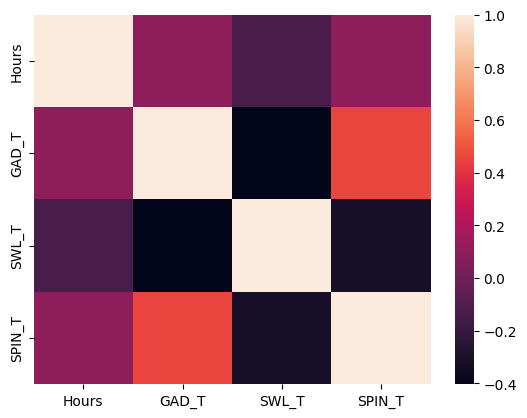

In [32]:
# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [33]:
# Trying to figure out how to clean playstyle. All the unique values in Playstyle.
game_df.groupby('Playstyle').size().sort_values(ascending = False)

Playstyle
Multiplayer - online - with real life friends                                             5286
Multiplayer - online - with strangers                                                     3927
Multiplayer - online - with online acquaintances or teammates                             2513
Singleplayer                                                                               725
Multiplayer - offline (people in the same room)                                             46
                                                                                          ... 
Multiplayer - online - sometimes with strangers, other times with online acquaintances       1
Multiplayer - online - with IRL teammates                                                    1
Multiplayer - online - with friends and/or strangers                                         1
Multiplayer - online - with friends i met online and i've spoked to them                     1
with strangers/IRL friends and online ac

In [34]:
# Trying to figure out how to clean earnings. All the unique values in earnings.
game_df.groupby('earnings').size().sort_values(ascending = False).head(20)

earnings
I play for fun                                                                                                                                                                                 11517
I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)                                                                                                        927
I earn a living by playing this game                                                                                                                                                              45
I play to win                                                                                                                                                                                      3
i try                                                                                                                                                                                              2
 play 

In [35]:
# Trying to figure out how to clean whyplay. All the unique values in whyplay.
game_df.groupby('whyplay').size().sort_values(ascending = False).head(20)

whyplay
having fun                      5060
improving                       4674
winning                         1968
relaxing                         619
All of the above                  25
all of the above                  20
Improving and having fun          10
improving and having fun           8
winning and improving              6
having fun and improving           5
both relaxing and having fun       3
All                                3
winning while having fun           3
Wasting time                       3
distraction                        3
All the above                      2
relaxing and having fun            2
playing with friends               2
Both winning and having fun        2
forgetting                         2
dtype: int64

In [36]:
# Trying to figure out how to clean League. All the unique values in League.
game_df.groupby('League').size().sort_values(ascending = False).head(50)

League
Gold          917
Silver        625
Platinum      605
Diamond       518
gold          302
Unranked      255
Diamond 5     205
silver        199
Gold V        198
Gold 1        190
Gold 3        189
Silver 1      188
Gold 5        180
Silver 2      169
Gold 2        161
platinum      158
Silver 3      146
diamond       143
Bronze        127
Gold 4        118
Platinum 3    117
unranked      115
Silver 4      113
Platinum 1    109
Platinum 2    109
Platinum 5    100
Diamond V      91
Silver 5       91
Diamond 3      79
Platinum V     78
Diamond 4      74
Platinum 4     73
Gold IV        71
Diamond 1      64
gold 5         63
Silver III     63
Gold III       59
gold 3         55
Bronze 1       55
gold 1         54
Master         53
Silver IV      51
Plat 5         50
Plat           49
Silver V       48
Gold           48
Challenger     46
Diamond 2      46
Silver I       46
gold 2         46
dtype: int64

In [37]:
# A function to clean league data.
def get_leagueInfo(df):

    if "gold" in str(df['League']).lower():
        df['League_clean'] = "gold"
    elif "silver" in str(df['League']).lower():
        df['League_clean'] = "silver"
    elif "plat" in str(df['League']).lower():
        df['League_clean'] = "platinum"
    elif "diamond" in str(df['League']).lower():
        df['League_clean'] = "diamond"
    elif "unranked" in str(df['League']).lower():
        df['League_clean'] = "unranked"
    elif "bronze" in str(df['League']).lower():
        df['League_clean'] = "bronze"
    elif "challenger" in str(df['League']).lower():
        df['League_clean'] = "challenger"
    elif "master" in str(df['League']).lower():
        df['League_clean'] = "master"
    else:
        df['League_clean'] = "Other"
    return df

In [38]:
# Function to clean whyplay data
def get_whyPlayInfo(df):

    if "fun" in str(df['whyplay']).lower():
        df['whyplay_clean'] = "fun"
    elif "improv" in str(df['whyplay']).lower():
        df['whyplay_clean'] = "improving"
    elif "win" in str(df['whyplay']).lower():
        df['whyplay_clean'] = "winning"
    elif "relax" in str(df['whyplay']).lower():
        df['whyplay_clean'] = "relaxing"
    elif "distract" in str(df['whyplay']).lower():
        df['whyplay_clean'] = "distraction"
    elif "all" in str(df['whyplay']).lower():
        df['whyplay_clean'] = "all"
    else:
        df['whyplay_clean'] = "Other"
    return df

In [39]:
# Function to clean playstyle
def get_PlaystyleInfo(df):

    if ("multiplayer" in str(df['Playstyle']).lower()) and ("online" in str(df['Playstyle']).lower()) and ("real" in str(df['Playstyle']).lower()) :
        df['Playstyle_clean'] = "Multiplayer - online - with real life friends"

    elif ("multiplayer" in str(df['Playstyle']).lower()) and ("online" in str(df['Playstyle']).lower()) and ("stranger" in str(df['Playstyle']).lower()) :
        df['Playstyle_clean'] = "Multiplayer - online - with strangers"

    elif ("multiplayer" in str(df['Playstyle']).lower()) and ("online" in str(df['Playstyle']).lower()) and ("acquaintance" in str(df['Playstyle']).lower()) :
        df['Playstyle_clean'] = "Multiplayer - online - with online acquaintances or teammates"

    elif ("multiplayer" in str(df['Playstyle']).lower()) and ("offline" in str(df['Playstyle']).lower()):
        df['Playstyle_clean'] = "multiplayer - offline"

    elif ("singleplayer" in str(df['Playstyle']).lower()) or ("solo" in str(df['Playstyle']).lower()):
        df['Playstyle_clean'] = "singleplayer"

    elif "all" in str(df['Playstyle']).lower():
        df['Playstyle_clean'] = "all"
    else:
        df['Playstyle_clean'] = "Other"
    return df

In [40]:
# Applying the function changes of league data cleaning to the dataframe
game_df = game_df.apply(get_leagueInfo, axis=1)

In [41]:
# Applying the function changes of whyplay data cleaning to the dataframe
game_df = game_df.apply(get_whyPlayInfo, axis=1)

In [42]:
# Applying the function changes of playstyle data cleaning to the dataframe
game_df = game_df.apply(get_PlaystyleInfo, axis=1)

In [43]:
# A little refined league, grouping by league and sorting in descending order to verify cleaning
game_df.groupby('League_clean').size().sort_values(ascending = False).head()

League_clean
gold        3103
platinum    2549
Other       2258
silver      2183
diamond     1513
dtype: int64

In [44]:
# A little refined whyplay, grouping by whyplay and sorting in descending order to verify cleaning
game_df.groupby('whyplay_clean').size().sort_values(ascending = False).head()

whyplay_clean
fun          5242
improving    4716
winning      1980
relaxing      620
Other         126
dtype: int64

In [45]:
# A little refined Playstyle, grouping by Playstyle and sorting in descending order to verify cleaning
game_df.groupby('Playstyle_clean').size().sort_values(ascending = False).head()

Playstyle_clean
Multiplayer - online - with real life friends                    5334
Multiplayer - online - with strangers                            3953
Multiplayer - online - with online acquaintances or teammates    2513
singleplayer                                                      749
Other                                                             148
dtype: int64